In [163]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
import collections
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer

# Disney

In [164]:
# Opened Disney CSV
disney = pd.read_csv('./Disney.csv',
                 sep=',')
disney.head(2)

,subreddit,selftext,title
0,DisneyWorld,NaN,The magical world of.... twitter
1,DisneyWorld,NaN,"There are many Main Streets in America, but th..."


In [165]:
# There were no duplicates and I viewed the sahape
disney.drop_duplicates()
disney.shape


(2000, 3)

In [166]:
# Added text to fill NAN values
disney.fillna('missingtextmissingtext', inplace=True)
disney.head(2)

,subreddit,selftext,title
0,DisneyWorld,missingtextmissingtext,The magical world of.... twitter
1,DisneyWorld,missingtextmissingtext,"There are many Main Streets in America, but th..."


In [5]:
# Combined the text and title columns
disney['title_text'] = disney['title'] + ' ' + disney['selftext']
disney.head(2)

,subreddit,selftext,title,title_text
0,DisneyWorld,missingtextmissingtext,The magical world of.... twitter,The magical world of.... twitter missingtextmi...
1,DisneyWorld,missingtextmissingtext,"There are many Main Streets in America, but th...","There are many Main Streets in America, but th..."


In [6]:
# Dropped the old text and title coulmns
disney = disney.drop(['selftext', 'title'], axis = 1)
disney.head(2)

,subreddit,title_text
0,DisneyWorld,The magical world of.... twitter missingtextmi...
1,DisneyWorld,"There are many Main Streets in America, but th..."


# Universal

In [7]:
# OPened the Universal CSV file
universal = pd.read_csv('./universal.csv',
                 sep=',')
universal.head(2)

,subreddit,selftext,title
0,UniversalOrlando,Alright guys - my first trip to Orlando is in ...,First Orlando trip September!
1,UniversalOrlando,Hi just looking for the place for the cheapest...,Best place for cheapest tickets?


In [8]:
# THre were no duplicates and I viewed the shape
universal.drop_duplicates()
universal.shape

(2000, 3)

In [9]:
# Added text to fill NAN values

universal.fillna('missingtextmissingtext', inplace=True)
universal.head(2)

,subreddit,selftext,title
0,UniversalOrlando,Alright guys - my first trip to Orlando is in ...,First Orlando trip September!
1,UniversalOrlando,Hi just looking for the place for the cheapest...,Best place for cheapest tickets?


In [10]:
# Combined the text and title columns

universal['title_text'] = universal['title'] + ' ' + universal['selftext']
universal.head(2)

,subreddit,selftext,title,title_text
0,UniversalOrlando,Alright guys - my first trip to Orlando is in ...,First Orlando trip September!,First Orlando trip September! Alright guys - m...
1,UniversalOrlando,Hi just looking for the place for the cheapest...,Best place for cheapest tickets?,Best place for cheapest tickets? Hi just looki...


In [11]:
# Dropped the old text and title coulmns
universal = universal.drop(['selftext', 'title'], axis = 1)
universal.head(2)

,subreddit,title_text
0,UniversalOrlando,First Orlando trip September! Alright guys - m...
1,UniversalOrlando,Best place for cheapest tickets? Hi just looki...


# Fun

In [12]:
# Combined the Disney and Universal dataframes
fun = pd.concat([disney, universal])
fun.head(2)

,subreddit,title_text
0,DisneyWorld,The magical world of.... twitter missingtextmi...
1,DisneyWorld,"There are many Main Streets in America, but th..."


In [13]:
# Viewed the shape
fun.shape

(4000, 2)

In [14]:
# VIewed info about the dataframe
fun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subreddit   4000 non-null   object
 1   title_text  4000 non-null   object
dtypes: object(2)
memory usage: 93.8+ KB


In [15]:
# fun.fillna('missingtextmissingtext', inplace=True)
# fun.head(2)

In [16]:
fun = fun.rename(columns ={'subreddit': 'label'})
fun['label'] = np.where(fun['label'] == 'DisneyWorld', 1, 0)
fun.head(2)

,label,title_text
0,1,The magical world of.... twitter missingtextmi...
1,1,"There are many Main Streets in America, but th..."


In [17]:
# Make All lowercase
# Remove HTML special entities (e.g. &amp;)
# Remove hyperlinks

def clean_words(words):
    words = words.lower()
    words = re.sub(r'\&\w*;', '', words)
    words = re.sub(r'https?:\/\/.*\/\w*', '', words)
    # Remhttp://localhost:8888/notebooks/Desktop/DSIR/Submissions/Projects/project_3-master/DvsU-Copy1%20Changed.ipynb#Lemmatizeove punctuation and split 's, 't, 've with a space for filter
    words = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', words)
    # Remove words with 2 or fewer letters
    words = re.sub(r'\b\w{1,2}\b', '', words)
    # Remove whitespace (including new line characters)
    words = re.sub(r'\s\s+', ' ', words)
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    words = ''.join(c for c in words if c <= '\uFFFF') 
#     words = re.sub("[^a-zA-Z]",           # The pattern to search for
#                       " ",                   # The pattern to replace it with
#                       words)   # The text to search
    return words

In [18]:
Applied cleaning function to dataframe
fun['title_text'] = fun['title_text'].apply(clean_words)
fun.shape

(4000, 2)

# Stop Words

In [19]:
# Viewed stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
# Added my own stopwords
# from Stackoverflow
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(len(stop_words))
stop_words.extend(['missingtextmissingtext', 'removed',
                   'orlando','florida','ride','hotel', 'flight', 'ticket','park',                    
                   'heat','trip', 'best', 'day', 'days', 'going', 'week', 'year',
                   'question','help','time','parks','planning', 'thanks', 'want', 'know',
                   'got', 'like','tickets','really', 'need', 'people', 'plan', 'use', 'early',
                   'way', 'sure', 'went', 'advice', 'able', 'new', 'looking', 'today', 'think',
                   'doe', 'wa', 'ha'
                   
                  ])
print(len(stop_words))

179
218


# Lemmatizer

In [21]:
# Instiantiated the Lemmatizer
lemmatizer = WordNetLemmatizer()

In [22]:
# Created a Lemmatizing function
# Credit to stack overflow
def lemmatize_words(text):
    lemms = text.split()
    lemms_words = ''
    for lemms in lemms:
        lemms_words += (lemmatizer.lemmatize(lemms) + ' ')
    return lemms_words

In [23]:
# ran the function on my dataset
fun['title_text'] = fun['title_text'].apply(lemmatize_words)
fun['title_text']

0       the magical world twitter missingtextmissingtext 
1       there are many main street america but there r...
2       the only way travel the magic kingdom the magi...
3       jungle cruise boat sinking missingtextmissingt...
4       not staying resort how get the park transport ...
                              ...                        
1995    how have the crowd been the rest the park sinc...
1996          who else here today missingtextmissingtext 
1997    can you use old wet wild souvenir cup the park...
1998    hhn and island adventure hey all family coming...
1999    the hulk fun ’ couple day ’ going universal an...
Name: title_text, Length: 4000, dtype: object

In [24]:
# Making the top words used in the the combined Fun 
count_vect = CountVectorizer(stop_words = text.ENGLISH_STOP_WORDS.union(stop_words), #(Help from Ansul)
                             max_features = 40) 

# input for CountVectorizer is an array of strings
vector_input_fun = fun['title_text']

# fit_transform the vectorizer
fun_words = count_vect.fit_transform(vector_input_fun)

# convert output to a Numpy array
fun_words = fun_words.toarray()
                          
fun_word_list = count_vect.get_feature_names()
print(fun_word_list)                        

['adventure', 'disney', 'epcot', 'experience', 'express', 'family', 'favorite', 'getting', 'good', 'hagrid', 'hhn', 'hotel', 'hour', 'kingdom', 'line', 'love', 'magic', 'make', 'night', 'open', 'orlando', 'park', 'pas', 'pass', 'place', 'post', 'resort', 'ride', 'say', 'staying', 'studio', 'thing', 'thread', 'ticket', 'universal', 'wait', 'wondering', 'work', 'world', 'worth']


In [25]:
# Making the top words used in the Disney subreddit
count_vect = CountVectorizer(stop_words = text.ENGLISH_STOP_WORDS.union(stop_words), #(Help from Ansul)
                             max_features = 20) 

# input for CountVectorizer is an array of strings
vector_input_Disney = fun[fun['label'] == 1]['title_text']

# fit_transform the vectorizer
Disney_words = count_vect.fit_transform(vector_input_Disney)

# convert output to a Numpy array
Disney_words = Disney_words.toarray()

# get the words
Disney_word_list = count_vect.get_feature_names()
print(Disney_word_list)

['animal', 'disney', 'edge', 'epcot', 'experience', 'family', 'galaxy', 'hollywood', 'hour', 'kingdom', 'magic', 'make', 'night', 'park', 'resort', 'ride', 'studio', 'ticket', 'wdw', 'world']


In [26]:
# Making the top words used in the Universal subreddit
count_vect = CountVectorizer(stop_words = text.ENGLISH_STOP_WORDS.union(stop_words), #(Help from Ansul)
                             max_features = 30) 

# input for CountVectorizer is an array of strings
vector_input_universal = fun[fun['label'] == 0]['title_text']

# fit_transform the vectorizer
universal_words = count_vect.fit_transform(vector_input_universal)

# convert output to a Numpy array
universal_words = universal_words.toarray()

# get the words
Universal_word_list = count_vect.get_feature_names()
print(Universal_word_list)

['adventure', 'bay', 'disney', 'experience', 'express', 'favorite', 'hagrid', 'harry', 'hhn', 'hotel', 'island', 'line', 'make', 'night', 'orlando', 'park', 'pas', 'pass', 'post', 'potter', 'resort', 'ride', 'studio', 'thing', 'thread', 'ticket', 'universal', 'wait', 'wondering', 'world']


In [82]:
# Code for plot from Anshul

In [83]:
# Code for freuently used word plot
cvec2 = CountVectorizer(stop_words = text.ENGLISH_STOP_WORDS.union(stop_words),
                               ngram_range =(1,1),
                             max_features = 30)
terms_sub = cvec2.fit_transform(fun['title_text'])
terms_sub_df = pd.DataFrame(terms_sub.toarray(),columns = cvec2.get_feature_names())
subr = np.where(fun['label'] == 1,1,0)
terms_sub_df.insert(0, 'target_subreddit',subr)
top_words = terms_sub_df.groupby('target_subreddit').mean().T.sort_values(0, ascending = False).head(30)
top_words.head()

target_subreddit,0,1
universal,0.5395,0.0155
park,0.5195,0.1910
ride,0.3850,0.1250
ticket,0.1985,0.0605
pas,0.1535,0.0300


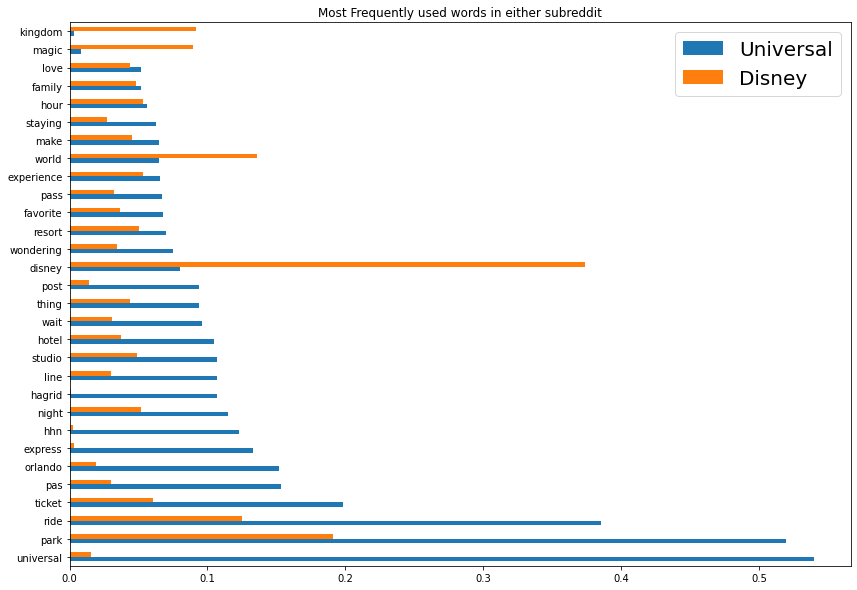

In [84]:
#  Code for freuently used word plot
top_words.plot(y=[0,1], kind = 'barh', figsize = (14,10))
plt.title("Most Frequently used words in either subreddit")
plt.legend(labels=['Universal', 'Disney'], fontsize =20);

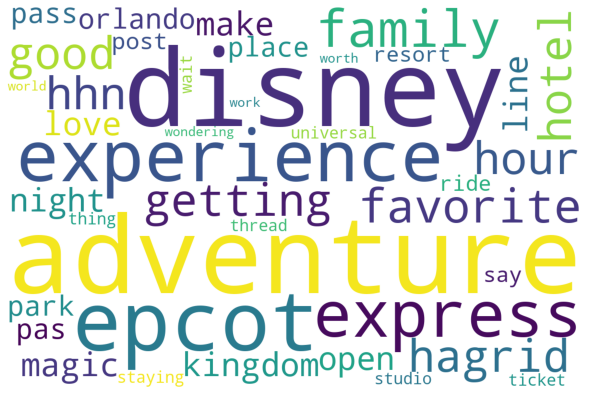

In [34]:
#Code From Geeksforgeeks
comment_words = '' 
stop_words = text.ENGLISH_STOP_WORDS.union(stop_words)
  
# iterate through the csv file 
for val in fun_word_list: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='white', 
                stopwords = text.ENGLISH_STOP_WORDS.union(stop_words), 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# I know word clouds are not data science, but I am planning on using it for my presentation

 # Model Set Up

In [87]:
# set the x and y values
X = fun['title_text']
y = fun['label']

In [88]:
# Split the data into the training and testing sets.
# Stratify - want the correct balance of my y's
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,      
                                                    random_state=42)

In [89]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer()

In [90]:
# Fit the vectorizer on our corpus.
cvec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [91]:
# Transform the corpus.
X_train = cvec.transform(X_train)

In [92]:
# Convert X_train into a DataFrame.

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())

In [93]:
# Transform test
X_test = cvec.transform(X_test)
X_test_df = pd.DataFrame(X_test.toarray(),
                         columns=cvec.get_feature_names())

# Count Vectorizer

In [42]:
# set the x and y values

X = fun['title_text']
y = fun['label']

In [43]:
# Redefine training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [44]:
# Baseline
y_test.value_counts(normalize=True)

1    0.5
0    0.5
Name: label, dtype: float64

In [45]:
# Tried lasso and ridge with alpha of 1 and 10.
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words = text.ENGLISH_STOP_WORDS.union(stop_words))),
    ('lr', LogisticRegression(penalty = 'l2', C=1, solver = 'liblinear'))
])

In [46]:
# Experimented with different parameters to use in modeling

pipe_params = {
    'cvec__max_features': [4_500, 4750,5000],
#     'cvec__min_df': [2, 3],
#     'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,4), (1,5), (1,6)]
}

In [47]:
gs = GridSearchCV(pipe, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

In [48]:
# Fit GridSearch to training data.
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [49]:
print(gs.best_params_)

{'cvec__max_features': 4500, 'cvec__ngram_range': (1, 5)}


In [50]:
# What's the best score?
print(gs.best_score_)

0.8802238805970148


In [51]:
# Save best model as gs_model.

gs_model = gs.best_estimator_

In [52]:
# Score model on training set.
gs_model.score(X_train, y_train)

0.9727611940298507

In [53]:
# Score model on testing set.
gs_model.score(X_test, y_test)

0.8803030303030303

# Multinomial Naive Bayes

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
# Started the count vectorizer
cvec = CountVectorizer()
train_data = cvec.fit_transform(X_train)
test_data = cvec.transform(X_test)
# Convert to array
train_data = train_data.toarray()

In [55]:
# Scored the multinomial
mnb = MultinomialNB()
mnb.fit(train_data, y_train)
mnb.score(train_data, y_train)

0.9414179104477612

In [56]:
mnb.score(test_data, y_test)

0.8893939393939394

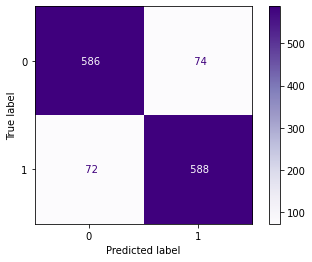

In [57]:
# Plottted confusion matrix
plot_confusion_matrix(mnb, 
                      test_data, 
                      y_test, 
                      cmap="Purples", 
                      values_format='4g');

# Tfidf

In [58]:
# Set Tfidf X and y
tX = fun['title_text']
ty = fun['label']

In [59]:
# Redefine training and testing sets.
tX_train, tX_test, ty_train, ty_test = train_test_split(tX,
                                                    ty,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [60]:
# Baseline
y_test.value_counts(normalize=True)

1    0.5
0    0.5
Name: label, dtype: float64

In [61]:
# Tried lasso and ridge with alpha of 1 and 10.

pipe = Pipeline([
    ('tvec', TfidfVectorizer(stop_words = text.ENGLISH_STOP_WORDS.union(stop_words))),
    ('lr', LogisticRegression(penalty = 'l2', C=1, solver = 'liblinear'))
])

In [62]:
# Experimented with different parameters to use in modeling

pipe_params = {
    'tvec__max_features': [3_500, 3_750, 4_000, 4250],
    'tvec__ngram_range': [(1,1), (1,2), (1,3), (1,4), (1,5)]
}

In [63]:
gs = GridSearchCV(pipe, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

In [64]:
# Fit GridSearch to training data.
gs.fit(tX_train, ty_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [65]:
print(gs.best_params_)

{'tvec__max_features': 3500, 'tvec__ngram_range': (1, 5)}


In [66]:
# What's the best score?
print(gs.best_score_)

0.882089552238806


In [67]:
# Save best model as gs_model.
gs_model = gs.best_estimator_

In [68]:
# Score model on training set.
gs_model.score(tX_train, ty_train)

0.9600746268656717

In [69]:
# Score model on testing set.
gs_model.score(tX_test, ty_test)

0.8848484848484849

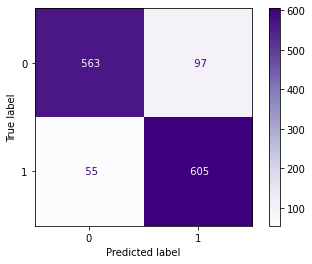

In [70]:
# Plottted confusion matrix
plot_confusion_matrix(gs, 
                      tX_test, 
                      ty_test, 
                      cmap="Purples", 
                      values_format='4g');

# Gaussian Naive Bayes

In [71]:

tvec = TfidfVectorizer()
# Fit and transform
train_data_t = tvec.fit_transform(X_train)

test_data_t = tvec.transform(X_test)

# Numpy arrays are easy to work with, so convert the result to an array.
train_data_t = train_data_t.toarray()
test_data_t = test_data_t.toarray()


In [72]:
# FIt the training data dn scored it
gnb = GaussianNB()
gnb.fit(train_data_t, y_train)
gnb.score(train_data_t, y_train)

0.9261194029850747

In [73]:
# Guassian did not perform well
gnb.score(test_data_t, y_test)

0.7613636363636364

# Sentiment Analysis

In [74]:
d = fun.loc[fun['label']==1,'title_text']
u = fun.loc[fun['label']==0,'title_text']

In [156]:
# Made lists of Positive and negative words
positive_words = ['thank','wonder', 'wonderful','laugh','magic', 'magical','affordable','good', 'fun','enjoy','best','delicious',
                  'helpful', 'enjoyed', 'ambiance', 'friendly', 'great', 'best', 'yummy','inexpensive', 'dream', 'pixie',
                 'adore','amaze','amazing','pleasant','love','cute','wow','loves','teriffic', 'recommend', 'wild', 'grand', 
                  'happiest', 'happy', 'happiness', 'inspirational'
                 ]
negative_words = ['unbearable', 'bear', 'long', 'rude','waste', 'awful', 'gross', 'confusing', 'unfair','blows',
                 'nasty', 'upset', 'worthless', 'worst', 'regret', 'annoying', 'problem', 'dissapoint', 'dissapointed', 
                 'despise', 'trouble', 'negative', 'unacceptable', 'hassle', 'hate', 'tragic', 'brutal', 'stupid', 'dumb', 
                 "painful", 'refuse', 'drunk', 'remorse', 'sick', 'shame', 'ashamed']

In [157]:
# Created ths function based on the one in our class notebook and edited with help major help from Dan
dmt=[]
dnt=[]
dlt =[]
for t in d:
            # Instantiate tokenizer.
    tokenizer = RegexpTokenizer(r'\w+') # splitting up words while getting rid of punctuation and line breaks
    tokens = tokenizer.tokenize(t) # force the text to be lower case
    p_stemmer = PorterStemmer()
    stemmed_words = [p_stemmer.stem(i) for i in tokens]
    dlt.append(stemmed_words)
    positive_stems = [p_stemmer.stem(i) for i in set(positive_words)]
    negative_stems = [p_stemmer.stem(i) for i in set(negative_words)]
    positive_count = len([i for i in stemmed_words if i in positive_stems])
    negative_count = len([i for i in stemmed_words if i in negative_stems])
    if positive_count - negative_count > 0:
        dmt.append(1)
    elif positive_count-negative_count<0:
        dnt.append(1)

sum(dmt)/(sum(dmt)+sum(dnt))


0.948905109489051

In [158]:
# disney positive posts
sum(dmt)

650

In [159]:
# disney negative posts
sum(dnt)

35

In [160]:
umt=[]
unt=[]
ult=[]
for t in u:
            # Instantiate tokenizer.
    tokenizer = RegexpTokenizer(r'\w+') # splitting up words while getting rid of punctuation and line breaks
    # Tokenize text.
    tokens = tokenizer.tokenize(t) # force the text to be lower case
#     mt.append(tokens)  
    p_stemmer = PorterStemmer()
        # Stem words.
    stemmed_words = [p_stemmer.stem(i) for i in tokens]
    ult.append(stemmed_words)
    positive_stems = [p_stemmer.stem(i) for i in set(positive_words)]
    negative_stems = [p_stemmer.stem(i) for i in set(negative_words)]
    positive_count = len([i for i in stemmed_words if i in positive_stems])
    negative_count = len([i for i in stemmed_words if i in negative_stems])
    if positive_count - negative_count > 0: # appends count to umt
        umt.append(1)
    elif positive_count-negative_count<0:
        unt.append(1)
sum(umt)/(sum(umt)+sum(unt))

0.9010152284263959

In [161]:
# Universal positive posts
sum(umt)

710

In [162]:
# Universal negative posts
sum(unt)

78